In [13]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Basic data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Model evaluation and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Support Vector Machines (SVM)
from sklearn.svm import SVC, LinearSVC

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Feature selection
from sklearn.feature_selection import SelectFromModel, RFE

# parameter logging
import wandb

# Other dependencies
import joblib
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from pyspatialml import Raster
import rasterio
from rasterio.plot import show


In [9]:
model_name = "models/best_RF_Foresthybrid" + str(4) + "_featuresel.pkl"
rfe = joblib.load(model_name)

In [34]:
feature_importances = np.mean([tree.feature_importances_ for tree in rfe.estimator_.estimators_], axis=0)

In [35]:
feature_importances

array([0.11507633, 0.10396209, 0.2453773 , 0.53558428])

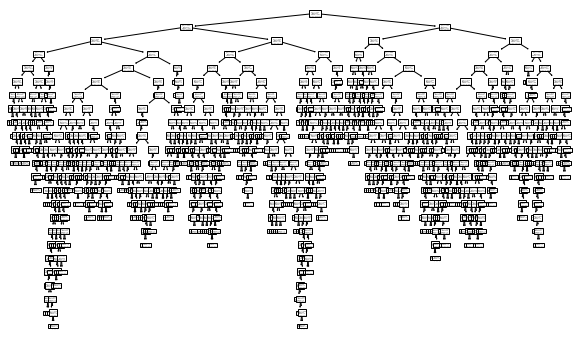

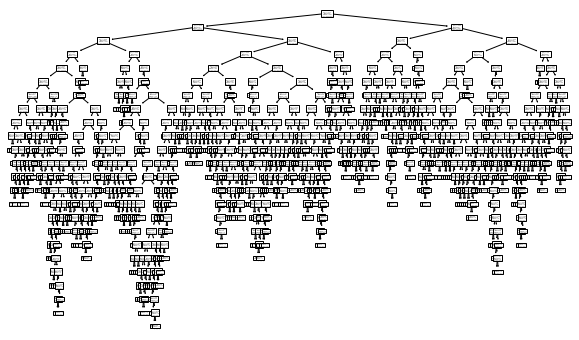

KeyboardInterrupt: 

In [36]:
# Sort the trees based on feature importance and select the top k trees
k = 3
important_tree_indices = np.argsort(feature_importances)[-k:]

# Visualize the selected important trees
for idx in important_tree_indices:
    decision_tree = rfe.estimator_.estimators_[idx]
    plt.figure(figsize=(10, 6))
    tree.plot_tree(decision_tree)
    plt.show()